### The purpose of this notebook is to load the referential data of `chairs-in-context` and package them in a pandas dataframe along with other simple datastructures like dictionaries that map integers to tokens etc. Having access to these pre-processed data, is the first step before you start training neural listener ans speakers.

In [1]:
import numpy as np
import os.path as osp
import pandas as pd

from shapeglot.simple_utils import unique_rows, unpickle_data, pickle_data, invert_dictionary, sort_dict_by_val
from shapeglot.in_out.game_data_preprocessing import preprocess_geometry, preprocess_language
from shapeglot.in_out.game_data_preprocessing import basic_game_statistics
from shapeglot import vis_utils
from shapeglot.vis_utils import visualize_game_example

%load_ext autoreload
%autoreload 2
%matplotlib inline

### Define the data files

In [2]:
# After running download_data.sh this is where the shapeglot_data should be.
top_data_dir = '../../data/main_data_for_chairs' 

# Downloaded files that will be used to prepare the data:
game_interactions = osp.join(top_data_dir, 'language/shapenet_chairs.csv')
misspelling_corrector = osp.join(top_data_dir, 'language/word_spell_manual_corrector_chairs.pkl')
top_image_dir = osp.join(top_data_dir, 'images/shapenet')
vis_utils.top_image_dir = top_image_dir

### User defined settings


In [3]:
tokenizer = 'naive'  # ['naive' or 'spacy'] (you can use spacy if it is installed)

# Replace rare words with <UNK>
replace_rare = 1  # If a word occurs less/equal to this, is rare. (put 0 to keep all words)


# For comparative and superlative adjetives break their ending: 
# nicer -> ['nice', 'er'], nicest -> ['nice', 'est']
do_compar_superlative = True  # (if True, assumes nltk is installed)


# Apply some spell-checking we manually created, 
# or use 'spell_corrector=None' to ignore spelling mistakes.
# spell_corrector = next(unpickle_data(misspelling_corrector, python2_to_3=True))
spell_corrector = None


### Load and prerocess the referential data

In [4]:
# Load the data
game_data = pd.read_csv(game_interactions)
# Convert ShapeNet code-names to integers.
game_data, sn_model_to_int = preprocess_geometry(game_interactions)

# Tokenize/process utterances.
game_data, word_to_int = preprocess_language(game_data, 
                                             spell_corrector=spell_corrector,
                                             replace_rare=replace_rare,
                                             tokenizer=tokenizer,
                                             do_compar_superlative=do_compar_superlative)
print ('Vocabulary, size:', len(word_to_int))

# Rare words: 3960
Ruined sentences(contain only rare words): 57
Vocabulary, size: 3917


In [5]:
# Make some auxiliary data-structures that are helpful for accessing the data
int_to_sn_model = invert_dictionary(sn_model_to_int)
sorted_sn_models = [k[1] for k in sort_dict_by_val(int_to_sn_model)]
int_to_word = invert_dictionary(word_to_int)

In [6]:
## print some basic statistics of the resulting data.
basic_game_statistics(game_data, word_to_int)

# Utterances 78725
# dialogues 8573
Average utterance length 7.46811051127342
# Easy triplets 39373
Human precision in easy 0.9728748126888985
# Hard triplets 39352
Human precision in hard 0.9430270380158569
Unique chairs:  4511
Unique triplets (ignoring target): 4054


### Visualize the resuting triplets:

Utterance: comfy chair - not the sofa
Context: easy
Guessed correct: True
Target: 2


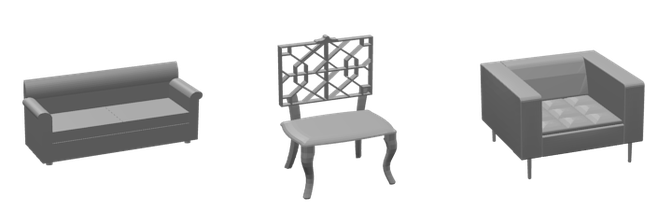

In [7]:
rid = np.random.randint(len(game_data))
visualize_game_example(game_data, rid, sorted_sn_models, int_to_word)

In [8]:
# save the data to the top data directory as a pkl
save_file = osp.join(top_data_dir, 'game_data.pkl')
pickle_data(save_file, game_data, word_to_int, int_to_word, int_to_sn_model, sn_model_to_int, sorted_sn_models)